# Bull call spread

call option 을 사고 동시에 더 높은 실행가의 call option 을 파는 전략.

이 전략의 목적은 주식의 작은 상승에서 이익을 얻는 것이다. 

아래에서 실행가 950 원의 long call 과 940 원의 short call 을 그래프로 그려본다.

In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Call payoff
call option 을 매수한 경우의 수익을 계산하는 함수 정의. 

sT (range of possible values of stock price at expiration), strike price of the call option, 콜옵션의 premium 을 파라미터로 받아 call option payoff 를 return 한다.

In [101]:
def call_payoff(st, strike_price, premium):
    return np.where(st > strike_price, st - strike_price, 0) - premium

In [102]:
# 현물 가격
spot_price = 900 

# Long call
strike_price_long_call = 920 
premium_long_call = 15

# Short call
strike_price_short_call = 940 
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.95*spot_price,1.1*spot_price,1) 

Max Profit : 15.0
Max Loss : -5.0


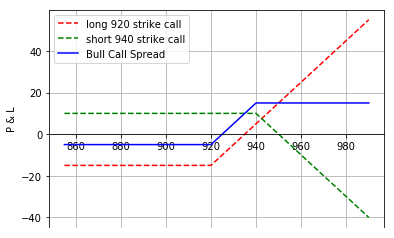

In [103]:
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_short_call = -call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_bull_call_spread = payoff_long_call + payoff_short_call
fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_call,'--', color='r', label="long 920 strike call")
ax.plot(sT, payoff_short_call,'--',color='g', label="short 940 strike call")
ax.plot(sT, payoff_bull_call_spread, 'b-', label="Bull Call Spread")
ax.grid(True)
plt.legend()
plt.ylabel('P & L')
print("Max Profit :", max(payoff_bull_call_spread))
print("Max Loss :", min(payoff_bull_call_spread))

최대수익과 최대 손실이 모두 제한되며, 약간의 강세장이 예상될 때의 투자 전략.

# Bear put spread

Bear put spread 전략은 풋옵션을 매수하고 동시에 더 낮은 실행가의 풋옵션을 매도하여 성립된다.

전략의 목표는 주가의 작은 하락에서 이익을 얻는 것이다. 

아래에서 실행가 880 의 put 매수, 실행가 860 의 풋 매도의 수익 그래프를 그려본다.

In [104]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

In [105]:
# 현물 가격
spot_price = 900 

# Long call
strike_price_long_put = 880 
premium_long_put = 15

# Short call
strike_price_short_put = 860
premium_short_put = 10

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

Max Profit : 15.0
Max Loss : -5.0


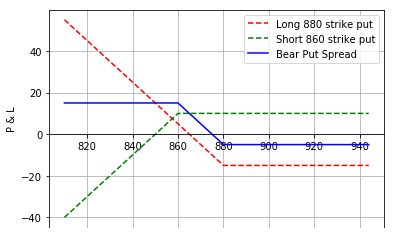

In [106]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = - put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bear_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_put, 'r--', label="Long 880 strike put")
ax.plot(sT, payoff_short_put, 'g--', label="Short 860 strike put")
ax.plot(sT, payoff_bear_put_spread, 'b-', label="Bear Put Spread")
plt.grid(True)
plt.ylabel('P & L')
plt.legend()
print("Max Profit :", max(payoff_bear_put_spread))
print("Max Loss :", min(payoff_bear_put_spread))

최대수익과 최대 손실이 모두 제한되며, 약간의 약세장이 예상될 때의 투자 전략.

# Protective put

Protective Put 은 주식을 사고 동시에 풋옵션을 사는 것이다.

전략의 목표는 역방향의 주가 움직임에서 보호하는 것이다.

In [107]:
# 현물가격
spot_price = 700 

# A 종목 매수가
stock_purchase_price = 700 

# Long 700 strike put
strike_price_long_put = 700
premium_long_put = 20

# 풋옵션 만기일의 주가 예상 범위
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

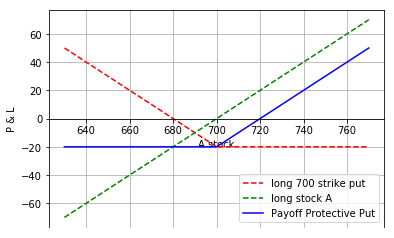

In [108]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_stock_A = sT - stock_purchase_price
payoff_protective_put = payoff_long_put + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, 'r--', label="long 700 strike put")
ax.plot(sT, payoff_stock_A, 'g--', label="long stock A")
ax.plot(sT, payoff_protective_put, 'b-', label="Payoff Protective Put")
plt.grid(True)
plt.legend()
plt.xlabel('A stock')
plt.ylabel('P & L');

주가가 700 아래로 떨어질 경우 최대 손실은 프리미엄 지불 가격인 20 으로 제한되고, 700 이상으로 오르면 가격 상승에 비례하여 수익은 커진다.

# Covered call strategy

Covered call 은 주식을 매수하고 동시에 콜옵션을 매도하는 것이다.

이 전략은 주식이 오르지도 내리지도 않을 것 같을 때 사용한다. 

In [124]:
# 현물가격
spot_price = 300 

# Short call
strike_price_short_call = 300
premium_short_call = 10

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

Text(0,0.5,'P & L')

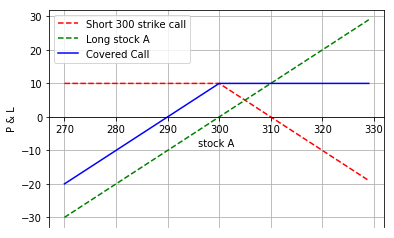

In [125]:
payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_stock_A = sT - spot_price
payoff_covered_call = payoff_short_call + payoff_stock_A

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'r--', label='Short 300 strike call')
ax.plot(sT, payoff_stock_A, 'g--', label='Long stock A')
ax.plot(sT, payoff_covered_call, 'b-', label='Covered Call')
plt.legend()
plt.grid(True)
plt.xlabel('stock A')
plt.ylabel('P & L')

A 주가가 300 이상의 어느 가격이 되더라도 최대 수익은 옵션 프리미엄인 10 으로 제한되고 주가가 300 아래로 떨어지면 최대 손식은 가격 하락에 비례한다.